## Data Importing, Cleaning and Imputation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import missingno as msno

In [3]:
competition_clubs = pd.read_csv('../data/2024_12_10_19_04/competition_clubs.csv')
player_info = pd.read_csv('../data/2024_12_10_19_04/player_info.csv')
player_jersey_numbers = pd.read_csv('../data/2024_12_10_19_04/player_jersey_numbers.csv')
player_market_values = pd.read_csv('../data/2024_12_10_19_04/player_market_values.csv')

In [4]:
"""
Fixing competition_clubs so it doesn't have an issue when merging
"""
display(competition_clubs.head())

# Step 1: Split the 'season_id(s)' column and explode it into individual rows
expanded_competition_clubs = competition_clubs.copy()
expanded_competition_clubs['season_id(s)'] = expanded_competition_clubs['season_id(s)'].str.split(',')  # Split the string into lists
expanded_competition_clubs = expanded_competition_clubs.explode('season_id(s)')  # Create a new row for each season

# Step 2: Convert season_id(s) to the desired format (e.g., 2024 -> '24/25')
expanded_competition_clubs['season_id(s)'] = expanded_competition_clubs['season_id(s)'].astype(int)  # Ensure it's numeric for manipulation
expanded_competition_clubs['season_id(s)'] = expanded_competition_clubs['season_id(s)'].apply(lambda x: f"{str(x)[-2:]}/{str(x + 1)[-2:]}")

# Step 3: Rename the column to 'season'
expanded_competition_clubs.rename(columns={'season_id(s)': 'season'}, inplace=True)
expanded_competition_clubs.reset_index(drop=True, inplace=True)

display(expanded_competition_clubs.head(11))

,competition_id,season_id(s),club_id,club_name
0,GB1,"2024,2023,2022,2021,2020,2019,2018,2017,2016,2015",985,Manchester United
1,GB1,"2021,2019,2018,2017,2016,2015",1010,Watford FC
2,GB1,"2024,2023,2022,2021,2020,2019,2018,2017,2016,2015",29,Everton FC
3,GB1,"2024,2023,2022,2021,2020,2019,2018,2017,2016,2015",31,Liverpool FC
4,GB1,"2024,2023,2022,2021,2020,2019,2018,2017,2016,2015",631,Chelsea FC


,competition_id,season,club_id,club_name
0,GB1,24/25,985,Manchester United
1,GB1,23/24,985,Manchester United
2,GB1,22/23,985,Manchester United
3,GB1,21/22,985,Manchester United
4,GB1,20/21,985,Manchester United
5,GB1,19/20,985,Manchester United
6,GB1,18/19,985,Manchester United
7,GB1,17/18,985,Manchester United
8,GB1,16/17,985,Manchester United
9,GB1,15/16,985,Manchester United


11499


In [4]:
# Doing the data merges here to get the full dataset with I'll be working with
player_value_and_jnumbs = player_market_values.merge(
    player_jersey_numbers,
    on=['player_id', 'season', 'club_id'],
    how='inner'
)

player_value_and_jnumbs_upd = player_value_and_jnumbs.merge(
    expanded_competition_clubs,
    on=['season', 'club_id'],
    how='left'
)
players_df = player_info.merge(
    player_value_and_jnumbs_upd,
    on='player_id',
    how='left'
)
players_df.head()

,player_id,player_name,image_url,date_of_birth,height,primary_citizenship,secondary_citizenship,main_position,other_positions,preferred_foot,outfitter,date,club_id,value,season,jersey_number,competition_id,club_name
0,312533,Callum Williams,NaN,"Feb 4, 1997","1,80m",England,NaN,Right-Back,"Defensive Midfield, Centre-Back",right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1053147,Mahamadou Diawara,https://img.a.transfermarkt.technology/portrai...,"Feb 17, 2005","1,87m",France,Mali,Central Midfield,NaN,left,adidas,"Oct 16, 2023",1041.0,€1.00m,23/24,17.0,FR1,Olympique Lyon
2,1053147,Mahamadou Diawara,https://img.a.transfermarkt.technology/portrai...,"Feb 17, 2005","1,87m",France,Mali,Central Midfield,NaN,left,adidas,"Oct 16, 2023",1041.0,€1.00m,23/24,34.0,FR1,Olympique Lyon
3,1053147,Mahamadou Diawara,https://img.a.transfermarkt.technology/portrai...,"Feb 17, 2005","1,87m",France,Mali,Central Midfield,NaN,left,adidas,"Dec 18, 2023",1041.0,€3.00m,23/24,17.0,FR1,Olympique Lyon
4,1053147,Mahamadou Diawara,https://img.a.transfermarkt.technology/portrai...,"Feb 17, 2005","1,87m",France,Mali,Central Midfield,NaN,left,adidas,"Dec 18, 2023",1041.0,€3.00m,23/24,34.0,FR1,Olympique Lyon


In [5]:
print(players_df.info())
print()
print(players_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234363 entries, 0 to 234362
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   player_id              234363 non-null  int64  
 1   player_name            234363 non-null  object 
 2   image_url              228944 non-null  object 
 3   date_of_birth          233970 non-null  object 
 4   height                 230017 non-null  object 
 5   primary_citizenship    234363 non-null  object 
 6   secondary_citizenship  86223 non-null   object 
 7   main_position          234315 non-null  object 
 8   other_positions        170015 non-null  object 
 9   preferred_foot         229445 non-null  object 
 10  outfitter              72124 non-null   object 
 11  date                   234048 non-null  object 
 12  club_id                234048 non-null  float64
 13  value                  232346 non-null  object 
 14  season                 234048 non-nu

In [6]:
"""
Cleaning up the dataframe and re-organizing it
"""

updated_players_df = players_df.copy()

# Renaming columns
updated_players_df.rename(columns={'date': 'date_assessed', 'value': 'market_value_euros'}, inplace=True)

# Converting to int types
updated_players_df['jersey_number'] = updated_players_df['jersey_number'].astype('Int64')
updated_players_df['club_id'] = updated_players_df['club_id'].astype('Int64')

# Converting date columns to datetime
updated_players_df['date_of_birth'] = pd.to_datetime(updated_players_df['date_of_birth'], errors='coerce')
updated_players_df['date_assessed'] = pd.to_datetime(updated_players_df['date_assessed'], errors='coerce')

# Filtering dataset to our club, competition and season parameters
updated_players_df = updated_players_df[updated_players_df['club_id'].isin(competition_clubs['club_id'].unique())]
updated_players_df = updated_players_df[updated_players_df['date_assessed'] >= '2015-07-01']

# Convert specified columns to categorical
categorical_columns = ['main_position', 'preferred_foot', 'outfitter',
                       'season', 'competition_id']
for col in categorical_columns:
    updated_players_df[col] = updated_players_df[col].astype('category')

# Rename the categories in the 'competition_id' column
competition_mapping = {
    'ES1': 'LaLiga',
    'FR1': 'Ligue 1',
    'GB1': 'Premier League',
    'IT1': 'Serie A',
    'L1': '1. Bundesliga'
}
updated_players_df['competition_id'] = updated_players_df['competition_id'].cat.rename_categories(competition_mapping)

# Convert height to float by removing 'm', then rename to height_meters
updated_players_df['height_meters'] = (
    updated_players_df['height']
    .str.replace(',', '.', regex=False)  # Replace commas with dots
    .str.replace('m', '', regex=False)  # Remove 'm'
    .astype(float)  # Convert to float
)
updated_players_df.drop(columns=['height'], inplace=True)

# Rename 'value' to 'market_value' and convert to int
updated_players_df['market_value_euros'] = (
    updated_players_df['market_value_euros']
    .str.replace('€', '', regex=False)
    .str.replace('m', 'e6', regex=False)
    .str.replace('k', 'e3', regex=False)
    .apply(pd.to_numeric, errors='coerce')
    .astype('Int64')
)

# Creating an age when assessed market_value was assessed
updated_players_df['age_when_assessed'] = ((updated_players_df['date_assessed'] - updated_players_df['date_of_birth']).dt.days // 365).astype('Int64')

# Reorder the columns
column_order = [
    'season', 'competition_id', 'club_id', 'club_name', 'player_id', 'player_name',
    'date_of_birth', 'height_meters', 'primary_citizenship', 'secondary_citizenship',
    'main_position', 'other_positions', 'preferred_foot', 'outfitter', 'jersey_number',
    'market_value_euros', 'date_assessed', 'age_when_assessed', 'image_url'
]
updated_players_df = updated_players_df[column_order]

# Displaying the updated dataframe
print(updated_players_df.info())
print(updated_players_df.isnull().sum())
updated_players_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 95000 entries, 1 to 234362
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   season                 95000 non-null  category      
 1   competition_id         70546 non-null  category      
 2   club_id                95000 non-null  Int64         
 3   club_name              70546 non-null  object        
 4   player_id              95000 non-null  int64         
 5   player_name            95000 non-null  object        
 6   date_of_birth          94874 non-null  datetime64[ns]
 7   height_meters          94382 non-null  float64       
 8   primary_citizenship    95000 non-null  object        
 9   secondary_citizenship  37086 non-null  object        
 10  main_position          94998 non-null  category      
 11  other_positions        69439 non-null  object        
 12  preferred_foot         94074 non-null  category      
 13  outfi

,season,competition_id,club_id,club_name,player_id,player_name,date_of_birth,height_meters,primary_citizenship,secondary_citizenship,main_position,other_positions,preferred_foot,outfitter,jersey_number,market_value_euros,date_assessed,age_when_assessed,image_url
1,23/24,Ligue 1,1041,Olympique Lyon,1053147,Mahamadou Diawara,2005-02-17,1.87,France,Mali,Central Midfield,NaN,left,adidas,17,1000000,2023-10-16,18,https://img.a.transfermarkt.technology/portrai...
2,23/24,Ligue 1,1041,Olympique Lyon,1053147,Mahamadou Diawara,2005-02-17,1.87,France,Mali,Central Midfield,NaN,left,adidas,34,1000000,2023-10-16,18,https://img.a.transfermarkt.technology/portrai...
3,23/24,Ligue 1,1041,Olympique Lyon,1053147,Mahamadou Diawara,2005-02-17,1.87,France,Mali,Central Midfield,NaN,left,adidas,17,3000000,2023-12-18,18,https://img.a.transfermarkt.technology/portrai...
4,23/24,Ligue 1,1041,Olympique Lyon,1053147,Mahamadou Diawara,2005-02-17,1.87,France,Mali,Central Midfield,NaN,left,adidas,34,3000000,2023-12-18,18,https://img.a.transfermarkt.technology/portrai...
5,23/24,Ligue 1,1041,Olympique Lyon,1053147,Mahamadou Diawara,2005-02-17,1.87,France,Mali,Central Midfield,NaN,left,adidas,17,3000000,2024-06-03,19,https://img.a.transfermarkt.technology/portrai...


<Figure size 800x400 with 0 Axes>

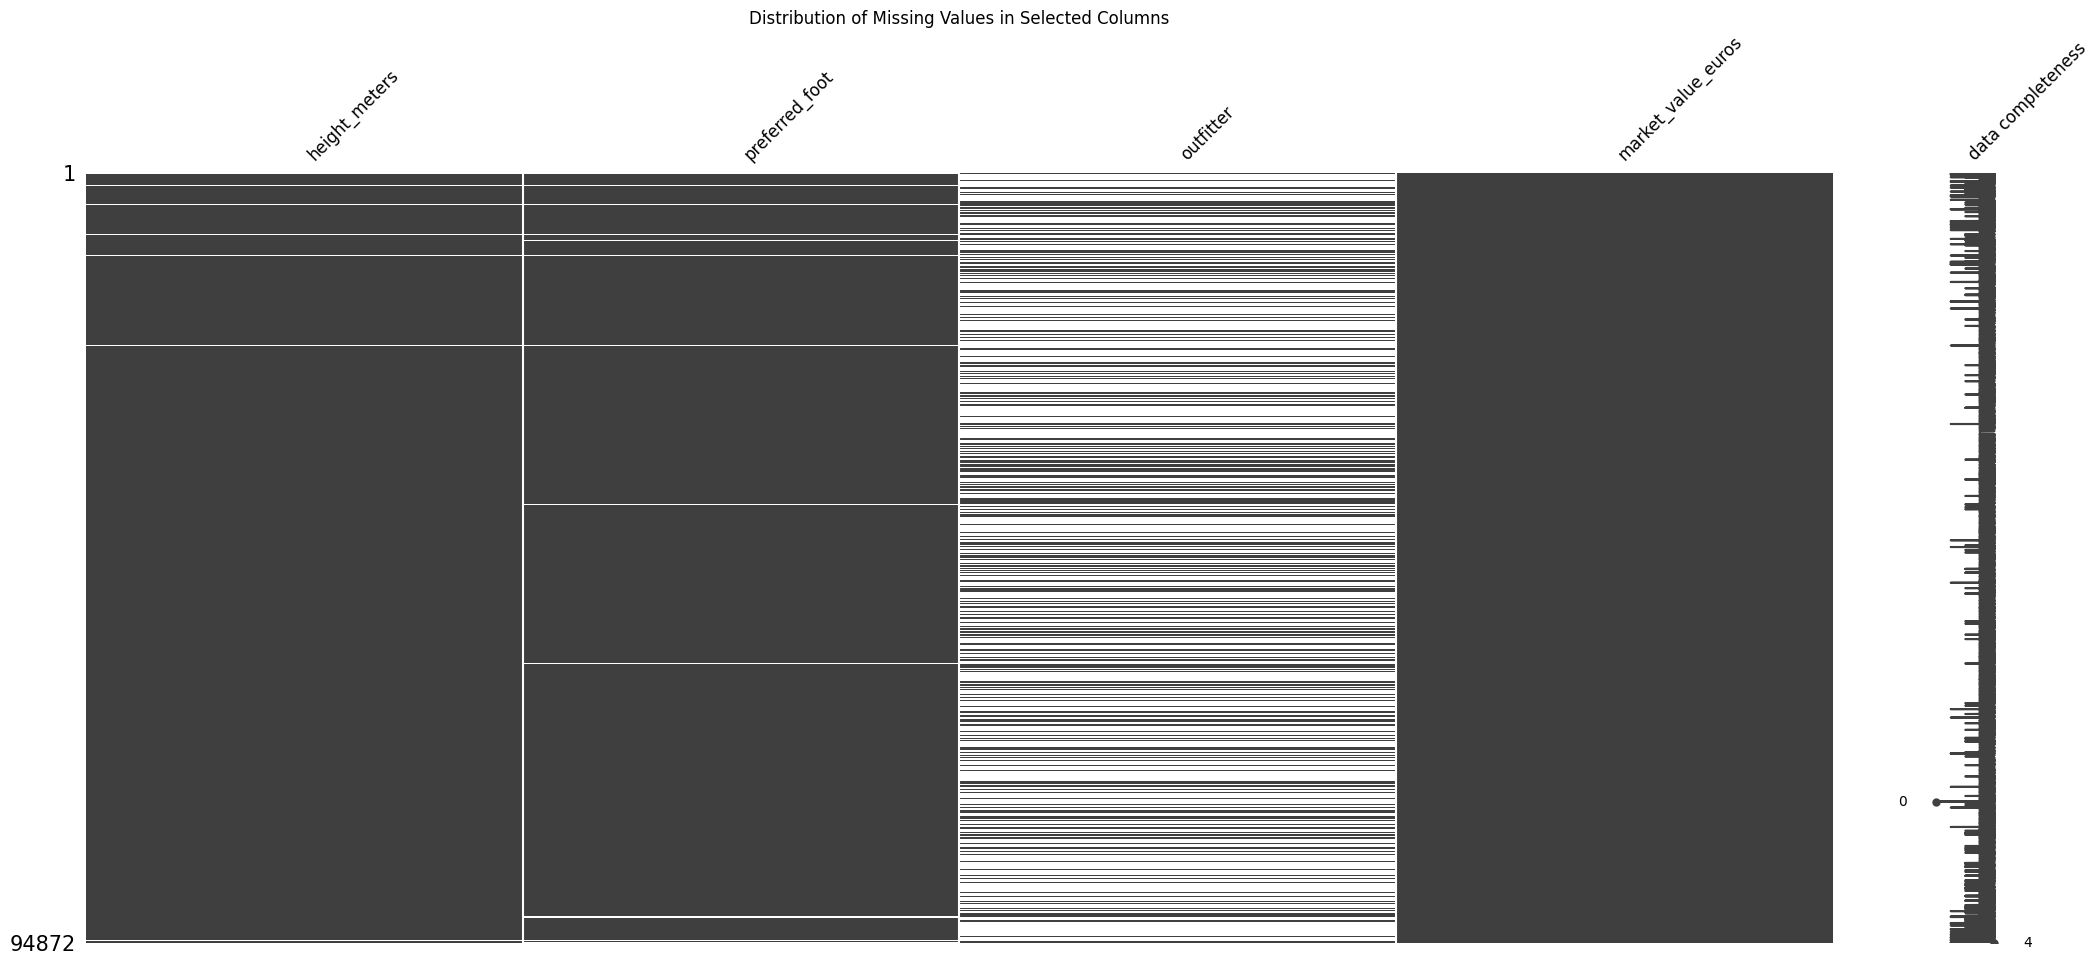

In [7]:
# Dropping rows where 'main_position' & 'date_of_birth' (null b/c deceased players) are null
updated_players_df.dropna(subset=['main_position', 'date_of_birth', 'age_when_assessed'], inplace=True)

# Temporarily sort the DataFrame by 'date_of_birth' in ascending order
temp_sorted_df = updated_players_df.sort_values(by='date_of_birth', ascending=True)

# Select the specified columns for visualization
columns_to_visualize = ['height_meters', 'preferred_foot', 'outfitter', 'market_value_euros']
visualization_df = temp_sorted_df[columns_to_visualize]

# Visualize missing data using missingno
plt.figure(figsize=(8, 4))
msno.matrix(visualization_df, fontsize=12, labels=True)
plt.title("Distribution of Missing Values in Selected Columns")
plt.show()

Seems like null values for `height_meters` is largely missing for 'older' players. While for `market_value_euros`, there is no missing values for a majority of data except the ends so either very old players or very young players. For `outfitter` & `preferred_foot` there isn't anly clear skews

In [8]:
"""
Imputing null market value observation for players that have non-null market value observations as well
through assigning the next closest market value assessment by date
"""
# Sort by player_id and date_assessed and assign it to a new DataFrame to avoid modifying the original
updated_players_df.sort_values(by=['player_id', 'date_assessed'], inplace=True)

# Filter rows with missing market_value_euros
missing_values_df = updated_players_df[updated_players_df['market_value_euros'].isna()]

# Iterate through each player_id with missing values
for player_id in missing_values_df['player_id'].unique():
    # Get the subset of rows for the current player_id
    player_rows = updated_players_df[updated_players_df['player_id'] == player_id]

    # Get the rows with missing market_value_euros for the current player
    missing_rows = player_rows[player_rows['market_value_euros'].isna()]

    for i, row in missing_rows.iterrows():
        date_assessed = row['date_assessed']

        # Find the closest previous row (if any)
        prev_row = player_rows[(player_rows['date_assessed'] < date_assessed) & (player_rows['market_value_euros'].notna())]

        # Find the closest next row (if any)
        next_row = player_rows[(player_rows['date_assessed'] > date_assessed) & (player_rows['market_value_euros'].notna())]

        # If both previous and next rows exist, choose the closer one
        if not prev_row.empty and not next_row.empty:
            prev_date = prev_row['date_assessed'].values[0]
            next_date = next_row['date_assessed'].values[0]

            if abs(date_assessed - prev_date) <= abs(next_date - date_assessed):
                updated_players_df.at[i, 'market_value_euros'] = prev_row['market_value_euros'].values[0]
            else:
                updated_players_df.at[i, 'market_value_euros'] = next_row['market_value_euros'].values[0]

        # If only previous row exists, use it
        elif not prev_row.empty:
            updated_players_df.at[i, 'market_value_euros'] = prev_row['market_value_euros'].values[0]

        # If only next row exists, use it
        elif not next_row.empty:
            updated_players_df.at[i, 'market_value_euros'] = next_row['market_value_euros'].values[0]

In [9]:
"""
1. Rest of the null values in market_value_euros likely represent players who played only a single season in the
"Top 5" leagues and did not play any significant minutes. So will drop them from the dataset.

2. Null values for `competition_id` & `club_name` represent observations for players that have played in the
"Top 5" leagues but the team is no longer competition in the top division for that season

3. Also, for right now will drop null values in `height_meters` & `preferred_foot` and will later impute them
if correlations are observed
"""
# Viewing null values after initial clean up
print("Before final clean up")
print(updated_players_df.isnull().sum())

# Filling null values in club_name that likely are present because of the initial merging
updated_players_df['club_name'] = updated_players_df.groupby('club_id')['club_name'].transform(lambda x: x.ffill().bfill())
updated_players_df['competition_id'] = updated_players_df['competition_id'].cat.add_categories(["Out of Top 5"])
updated_players_df['competition_id'] = updated_players_df['competition_id'].fillna("Out of Top 5")

clean_eda_players_df = updated_players_df.dropna(subset=['market_value_euros', 'height_meters', 'preferred_foot'])
print("\nAfter final clean up")
print(clean_eda_players_df.isnull().sum())
print(clean_eda_players_df.info())

Before final clean up
season                       0
competition_id           24415
club_id                      0
club_name                24415
player_id                    0
player_name                  0
date_of_birth                0
height_meters              614
primary_citizenship          0
secondary_citizenship    57856
main_position                0
other_positions          25517
preferred_foot             926
outfitter                61205
jersey_number                0
market_value_euros          10
date_assessed                0
age_when_assessed            0
image_url                  534
dtype: int64

After final clean up
season                       0
competition_id               0
club_id                      0
club_name                    0
player_id                    0
player_name                  0
date_of_birth                0
height_meters                0
primary_citizenship          0
secondary_citizenship    57204
main_position                0
other_positio

### Studying each column specifically (Univariate Analysis)

#### General
1. How many observations do we have per season; how many for each competition?
#### Player Age
2. What is the distribution of `date_of_birth` in general, and then broken down by season & competition
3. How old are the players on average? You could calculate the age of each player by subtracting `date_of_birth` from `date_assessed`
    * How does player age vary by competition and season? Is there a trend in terms of player age becoming younger or older over time?
#### Height
1. What is the average height of players in general; How is it broken down by season, competition?
2. What clubs for which season have had the largest & smallest average height
3. What are the outliers in height? Are there players with unusually high or low heights? What impact do these outliers have on your analysis?
4. **How does height vary by position and jersey numbers?** For example, goalkeepers might be taller than forwards.
#### Player’s Position
1. What is the distribution of main_position? Which positions are the most common? Are there fewer players in specific positions (e.g., goalkeepers)?
2. How does the distribution of main_position vary by season/competition? Has there been a shift in the types of positions over time?
#### Citizenships/Nationalities
1. What is the most common `primary_citizenship`; How does it vary by competitions and by seasons
    * How has the total percentage of 'native' players changed for each competition for each season?
#### Foot Preference
1. What is generally the difference in the number left and right footers (+ both) for `preferred_foot` and how does it vary by competition, season
2. How does the distribution of foot preference vary by position? For example, are left-footed players more common in certain positions (e.g., left-back or winger)?
#### Jersey Numbers
1. What is the distribution of `jersey_number` in general and for each competition. How has it changed every season?
2. Are certain `jersey_number` correlated with certain positions? How does it vary by league?
#### Market Values
1. What is the distribution of `market_value_euros` in general and for each competition. How has it changed every season? (Choose max value for each player for competition & season)
#### Outfitters
1. What are the most common outfitters per competition? How has it changed by the season?

In [10]:
"""
General Dataset Analysis
"""
display(clean_eda_players_df.describe())
display(clean_eda_players_df.describe(include='object'))

print(clean_eda_players_df.groupby('season', observed=False)['player_id'].nunique().sort_values(ascending=False))
print(clean_eda_players_df.groupby('competition_id', observed=False)['player_id'].nunique().sort_values(ascending=False))

# Calculate the counts of unique club_id by season and competition (for check)
num_clubs = clean_eda_players_df.groupby(['season', 'competition_id'], observed=False)['club_id'].nunique()
num_clubs = num_clubs.reset_index(name='club_count')
num_clubs_pivot_table = num_clubs.pivot_table(
    index='season',
    columns='competition_id',
    values='club_count',
    observed=False
)
num_clubs_pivot_table = num_clubs_pivot_table.astype('int')

# Calculate the counts of unique player_id by season and competition
counts_within_group = clean_eda_players_df.groupby(['season', 'competition_id'], observed=False)['player_id'].nunique()
counts_within_group_df = counts_within_group.reset_index(name='player_count')
counts_pivot_table = counts_within_group_df.pivot_table(
    index='season',
    columns='competition_id',
    values='player_count',
    observed=False
)
counts_pivot_table = counts_pivot_table.astype('int')

normalized_within_group = clean_eda_players_df.groupby(['season', 'competition_id'], observed=False)['player_id'].nunique()\
                                                    / clean_eda_players_df.groupby('season', observed=False)['player_id'].nunique()
normalized_within_group_df = normalized_within_group.reset_index(name='normalized_count')
normalized_pivot_table = normalized_within_group_df.pivot_table(
    index='season', 
    columns='competition_id', 
    values='normalized_count',
    observed=False
)
normalized_pivot_table = normalized_pivot_table.round(2)

# Print the pivot tables
print()
display(num_clubs_pivot_table)
display(counts_pivot_table)
display(normalized_pivot_table)


"""
=============== TEMPORARY
"""
prem_counts_within_group = clean_eda_players_df[clean_eda_players_df['competition_id'] == 'Premier League']\
                                                .groupby(['season', 'club_name'], observed=False)['player_id']\
                                                .nunique()
prem_counts_within_group = prem_counts_within_group.reset_index(name='player_count')
# Create the pivot table
prem_counts_pivot_table = prem_counts_within_group.pivot_table(
    index='season',
    columns='club_name',
    values='player_count',
    observed=False
)
prem_counts_pivot_table = prem_counts_pivot_table.astype('int')
display(prem_counts_pivot_table)

display(clean_eda_players_df[(clean_eda_players_df['club_id'] == 11) & (clean_eda_players_df['season'] == '24/25')])

,club_id,player_id,date_of_birth,height_meters,jersey_number,market_value_euros,date_assessed,age_when_assessed
count,93845.0,9.384500e+04,93845,93845.000000,93845.0,93845.0,93845,93845.0
mean,1275.733252,2.632422e+05,1994-06-01 07:56:05.536789504,1.825781,18.127263,7420962.864298,2020-06-17 06:40:43.220203520,25.560211
min,3.0,1.000000e+01,1975-03-14 00:00:00,1.590000,1.0,10000.0,2015-07-01 00:00:00,16.0
25%,167.0,9.413700e+04,1990-12-02 00:00:00,1.780000,8.0,800000.0,2018-05-30 00:00:00,22.0
50%,618.0,2.213160e+05,1994-09-08 00:00:00,1.830000,16.0,2500000.0,2020-08-25 00:00:00,25.0
75%,1108.0,3.711410e+05,1998-02-25 00:00:00,1.870000,24.0,8000000.0,2022-09-15 00:00:00,29.0
max,23826.0,1.247360e+06,2008-02-23 00:00:00,2.060000,99.0,200000000.0,2024-12-10 00:00:00,45.0
std,2669.485902,2.045659e+05,NaN,0.066444,15.029622,13413312.392141,NaN,4.514341


,club_name,player_name,primary_citizenship,secondary_citizenship,other_positions,image_url
count,93845,93845,93845,36641,68755,93367
unique,160,8709,143,139,131,8623
top,Paris Saint-Germain,Valentin Rongier,France,France,Central Midfield,https://img.a.transfermarkt.technology/portrai...
freq,1267,61,14756,7876,4358,61


season
20/21    3992
22/23    3955
21/22    3944
19/20    3859
18/19    3807
23/24    3805
17/18    3673
16/17    3659
15/16    3338
24/25    1350
Name: player_id, dtype: int64
competition_id
Out of Top 5      4487
Ligue 1           2182
Serie A           2177
Premier League    1875
LaLiga            1763
1. Bundesliga     1734
Name: player_id, dtype: int64



competition_id,LaLiga,Ligue 1,Premier League,Serie A,1. Bundesliga,Out of Top 5
season,,,,,,
15/16,20,20,20,20,18,59
16/17,20,20,20,20,18,62
17/18,20,20,20,20,18,60
18/19,20,20,20,20,18,59
19/20,20,20,20,20,18,62
20/21,20,20,20,20,18,59
21/22,20,20,20,20,18,59
22/23,20,20,20,20,18,60
23/24,20,18,20,20,18,62


competition_id,LaLiga,Ligue 1,Premier League,Serie A,1. Bundesliga,Out of Top 5
season,,,,,,
15/16,507,553,577,637,486,673
16/17,521,588,572,672,509,940
17/18,531,541,548,610,514,1012
18/19,529,565,556,609,526,1127
19/20,542,562,547,589,535,1189
20/21,558,566,585,645,537,1226
21/22,548,586,564,629,543,1193
22/23,544,580,587,614,538,1212
23/24,537,521,595,608,534,1128


competition_id,LaLiga,Ligue 1,Premier League,Serie A,1. Bundesliga,Out of Top 5
season,,,,,,
15/16,0.15,0.17,0.17,0.19,0.15,0.20
16/17,0.14,0.16,0.16,0.18,0.14,0.26
17/18,0.14,0.15,0.15,0.17,0.14,0.28
18/19,0.14,0.15,0.15,0.16,0.14,0.30
19/20,0.14,0.15,0.14,0.15,0.14,0.31
20/21,0.14,0.14,0.15,0.16,0.13,0.31
21/22,0.14,0.15,0.14,0.16,0.14,0.30
22/23,0.14,0.15,0.15,0.16,0.14,0.31
23/24,0.14,0.14,0.16,0.16,0.14,0.30


club_name,AFC Bournemouth,Arsenal FC,Aston Villa,Brentford FC,Brighton & Hove Albion,Burnley FC,Cardiff City,Chelsea FC,Crystal Palace,Everton FC,...,Sheffield United,Southampton FC,Stoke City,Sunderland AFC,Swansea City,Tottenham Hotspur,Watford FC,West Bromwich Albion,West Ham United,Wolverhampton Wanderers
season,,,,,,,,,,,,,,,,,,,,,
15/16,33,32,31,0,0,0,0,28,30,30,...,0,29,24,31,26,25,31,25,32,0
16/17,31,32,0,0,0,29,0,25,31,33,...,0,31,27,30,31,27,33,25,33,0
17/18,27,30,0,0,30,27,0,26,32,33,...,0,25,27,0,29,25,32,25,27,0
18/19,29,27,0,0,27,26,27,32,28,30,...,0,30,0,0,0,29,30,0,29,23
19/20,27,28,30,0,29,24,0,25,23,27,...,29,24,0,0,0,29,32,0,27,25
20/21,0,33,39,0,31,29,0,27,30,30,...,26,29,0,0,0,35,0,33,27,24
21/22,0,26,34,30,28,26,0,28,26,30,...,0,26,0,0,0,32,32,0,25,27
22/23,34,27,32,28,26,0,0,32,27,30,...,0,30,0,0,0,28,0,0,25,31
23/24,32,25,34,31,28,35,0,34,29,24,...,34,0,0,0,0,33,0,0,26,27


,season,competition_id,club_id,club_name,player_id,player_name,date_of_birth,height_meters,primary_citizenship,secondary_citizenship,main_position,other_positions,preferred_foot,outfitter,jersey_number,market_value_euros,date_assessed,age_when_assessed,image_url
207574,24/25,Premier League,11,Arsenal FC,203853,Oleksandr Zinchenko,1996-12-15,1.75,Ukraine,NaN,Left-Back,"Left Midfield, Central Midfield",left,Skechers,17,35000000,2024-10-01,27,https://img.a.transfermarkt.technology/portrai...
126618,24/25,Premier League,11,Arsenal FC,300716,Kieran Tierney,1997-06-05,1.80,Scotland,Isle of Man,Left-Back,"Centre-Back, Left Midfield",left,adidas,3,10000000,2024-10-01,27,https://img.a.transfermarkt.technology/portrai...
232961,24/25,Premier League,11,Arsenal FC,309400,Kai Havertz,1999-06-11,1.93,Germany,NaN,Centre-Forward,"Attacking Midfield, Right Winger",left,Puma,29,75000000,2024-10-01,25,https://img.a.transfermarkt.technology/portrai...
182221,24/25,Premier League,11,Arsenal FC,363205,Gabriel Jesus,1997-04-03,1.75,Brazil,NaN,Centre-Forward,"Left Winger, Right Winger",right,adidas,9,55000000,2024-10-01,27,https://img.a.transfermarkt.technology/portrai...
194453,24/25,Premier League,11,Arsenal FC,435338,Gabriel Magalhães,1997-12-19,1.90,Brazil,NaN,Centre-Back,NaN,left,NaN,6,75000000,2024-10-01,26,https://img.a.transfermarkt.technology/portrai...
79388,24/25,Premier League,11,Arsenal FC,655488,Gabriel Martinelli,2001-06-18,1.78,Brazil,Italy,Left Winger,Right Winger,right,adidas,11,60000000,2024-10-01,23,https://img.a.transfermarkt.technology/portrai...
86668,24/25,Premier League,11,Arsenal FC,890719,Ethan Nwaneri,2007-03-21,1.76,England,Nigeria,Attacking Midfield,"Centre-Forward, Right Winger",left,NaN,53,12000000,2024-10-01,17,https://img.a.transfermarkt.technology/portrai...
111870,24/25,Premier League,11,Arsenal FC,890721,Myles Lewis-Skelly,2006-09-26,1.78,England,Barbados,Defensive Midfield,"Central Midfield, Left-Back",left,adidas,49,5000000,2024-10-01,18,https://img.a.transfermarkt.technology/portrai...


**NOTE!!**

Noticed that for the 24/25 season, only Ligue 1 has the average expected amount of players which suggests that for the 24/25 season, 
other leagues do not have the observations for player's market values. So will drop the 24/25 season altogether for right now.

In [11]:
# Updating clean_eda_players_df here:
clean_eda_players_df = clean_eda_players_df[clean_eda_players_df['season'] != '24/25']
clean_eda_players_df['season'] = clean_eda_players_df['season'].cat.remove_unused_categories()
print(clean_eda_players_df['season'].cat.categories)

# Re-running the tables above:
display(clean_eda_players_df.describe())
display(clean_eda_players_df.describe(include='object'))

print(clean_eda_players_df.groupby('season', observed=False)['player_id'].nunique().sort_values(ascending=False))
print(clean_eda_players_df.groupby('competition_id', observed=False)['player_id'].nunique().sort_values(ascending=False))

Index(['15/16', '16/17', '17/18', '18/19', '19/20', '20/21', '21/22', '22/23',
       '23/24'],
      dtype='object')


,club_id,player_id,date_of_birth,height_meters,jersey_number,market_value_euros,date_assessed,age_when_assessed
count,92196.0,9.219600e+04,92196,92196.000000,92196.0,92196.0,92196,92196.0
mean,1277.621817,2.588357e+05,1994-05-01 16:00:09.371339392,1.825751,18.089407,7396987.504881,2020-05-19 16:48:43.857868032,25.56599
min,3.0,1.000000e+01,1975-03-14 00:00:00,1.590000,1.0,10000.0,2015-07-01 00:00:00,16.0
25%,167.0,9.373000e+04,1990-11-05 00:00:00,1.780000,8.0,800000.0,2018-05-30 00:00:00,22.0
50%,618.0,2.159770e+05,1994-08-03 00:00:00,1.830000,16.0,2500000.0,2020-07-08 00:00:00,25.0
75%,1108.0,3.635410e+05,1998-01-24 00:00:00,1.870000,24.0,8000000.0,2022-06-09 00:00:00,29.0
max,23826.0,1.159022e+06,2007-10-02 00:00:00,2.060000,99.0,200000000.0,2024-06-30 00:00:00,45.0
std,2678.086368,2.002952e+05,NaN,0.066440,14.972283,13366160.489717,NaN,4.514079


,club_name,player_name,primary_citizenship,secondary_citizenship,other_positions,image_url
count,92196,92196,92196,35866,67550,91743
unique,160,8540,143,138,131,8465
top,Paris Saint-Germain,Valentin Rongier,France,France,Central Midfield,https://img.a.transfermarkt.technology/portrai...
freq,1234,59,14350,7670,4277,59


season
20/21    3992
22/23    3955
21/22    3944
19/20    3859
18/19    3807
23/24    3805
17/18    3673
16/17    3659
15/16    3338
Name: player_id, dtype: int64
competition_id
Out of Top 5      4354
Serie A           2126
Ligue 1           2073
Premier League    1845
LaLiga            1723
1. Bundesliga     1692
Name: player_id, dtype: int64


In [12]:
# Printing counts for categorical columns
print()
print(clean_eda_players_df.drop_duplicates(subset='player_id')['main_position']\
                              .value_counts())
print(clean_eda_players_df.drop_duplicates(subset='player_id')\
                              ['preferred_foot']\
                              .value_counts())


main_position
Centre-Back           1514
Centre-Forward        1194
Central Midfield      1097
Goalkeeper             934
Defensive Midfield     712
Right-Back             645
Left-Back              623
Right Winger           567
Left Winger            563
Attacking Midfield     546
Second Striker          70
Left Midfield           66
Right Midfield          62
Name: count, dtype: int64
preferred_foot
right    6098
left     2215
both      280
Name: count, dtype: int64


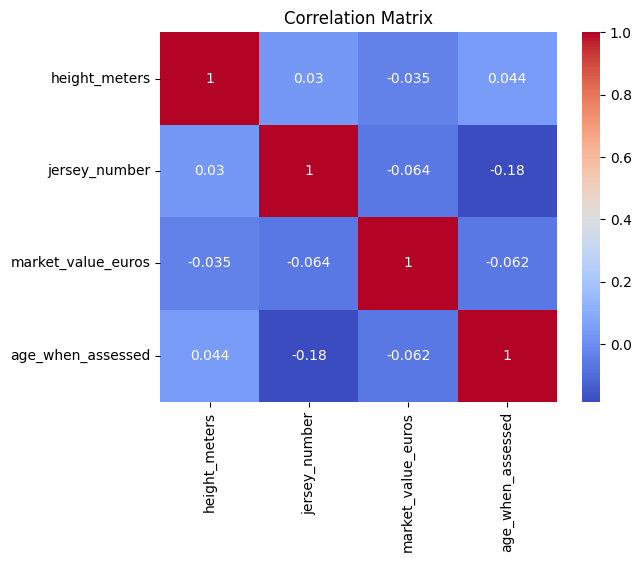

In [13]:
"""
No strong correlations in general data but relatively stronger
correlation with `jersey_number` & `age_when_assessed` which may
indicate a relationship is present
"""
correlation_matrix = clean_eda_players_df[['height_meters', 'jersey_number', 'market_value_euros', 'age_when_assessed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Create a dictionary for the competition color mappings
competition_colors = {
    'Premier League': '#38003c',
    'LaLiga': '#ffab44',
    'Serie A': '#0578FF',
    '1. Bundesliga': '#D10214',
    'Ligue 1': '#CDFB0A'
}

#### Player Age Analysis
1. What is the distribution of `date_of_birth` in general, and then broken down by season & competition
2. How old are the players on average? You could calculate the age of each player by subtracting `date_of_birth` from `date_assessed`
    * How does player age vary by competition and season? Is there a trend in terms of player age becoming younger or older over time?

In [15]:
print(clean_eda_players_df.dtypes)

season                         category
competition_id                 category
club_id                           Int64
club_name                        object
player_id                         int64
player_name                      object
date_of_birth            datetime64[ns]
height_meters                   float64
primary_citizenship              object
secondary_citizenship            object
main_position                  category
other_positions                  object
preferred_foot                 category
outfitter                      category
jersey_number                     Int64
market_value_euros                Int64
date_assessed            datetime64[ns]
age_when_assessed                 Int64
image_url                        object
dtype: object


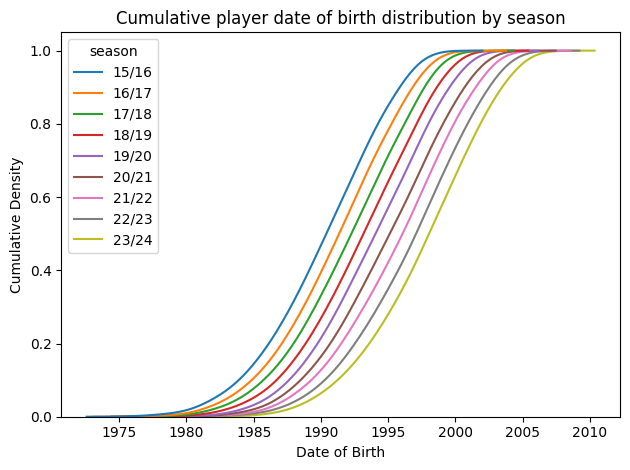

In [16]:
# Cumulative KDE plot to see general `date_of_birth` distribution by season
sns.kdeplot(data=clean_eda_players_df.drop_duplicates(
                subset=['season', 'competition_id', 'club_id', 'player_id'], # Only concerned with player appearance so only unique values
                keep='first'),
            x='date_of_birth',
            hue='season',
            cumulative=True,
            fill=False,
            common_norm=False)
plt.title('Cumulative player date of birth distribution by season')
plt.xlabel('Date of Birth')
plt.ylabel('Cumulative Density')

# Display the plots
plt.tight_layout()
plt.show()

**Interpretation:** Regions with the steepest slope show greatest density of observations, so in this is just proving that as seasons progress, mode of date of birth also shifts higher

In [17]:
# Cumulative KDE plot to see general `date_of_birth` distribution by season, but n
print(len(clean_eda_players_df.drop_duplicates(
                subset=['season', 'competition_id', 'club_id', 'player_id'], # Only concerned with player appearance so only unique values
                keep='first')))

35810


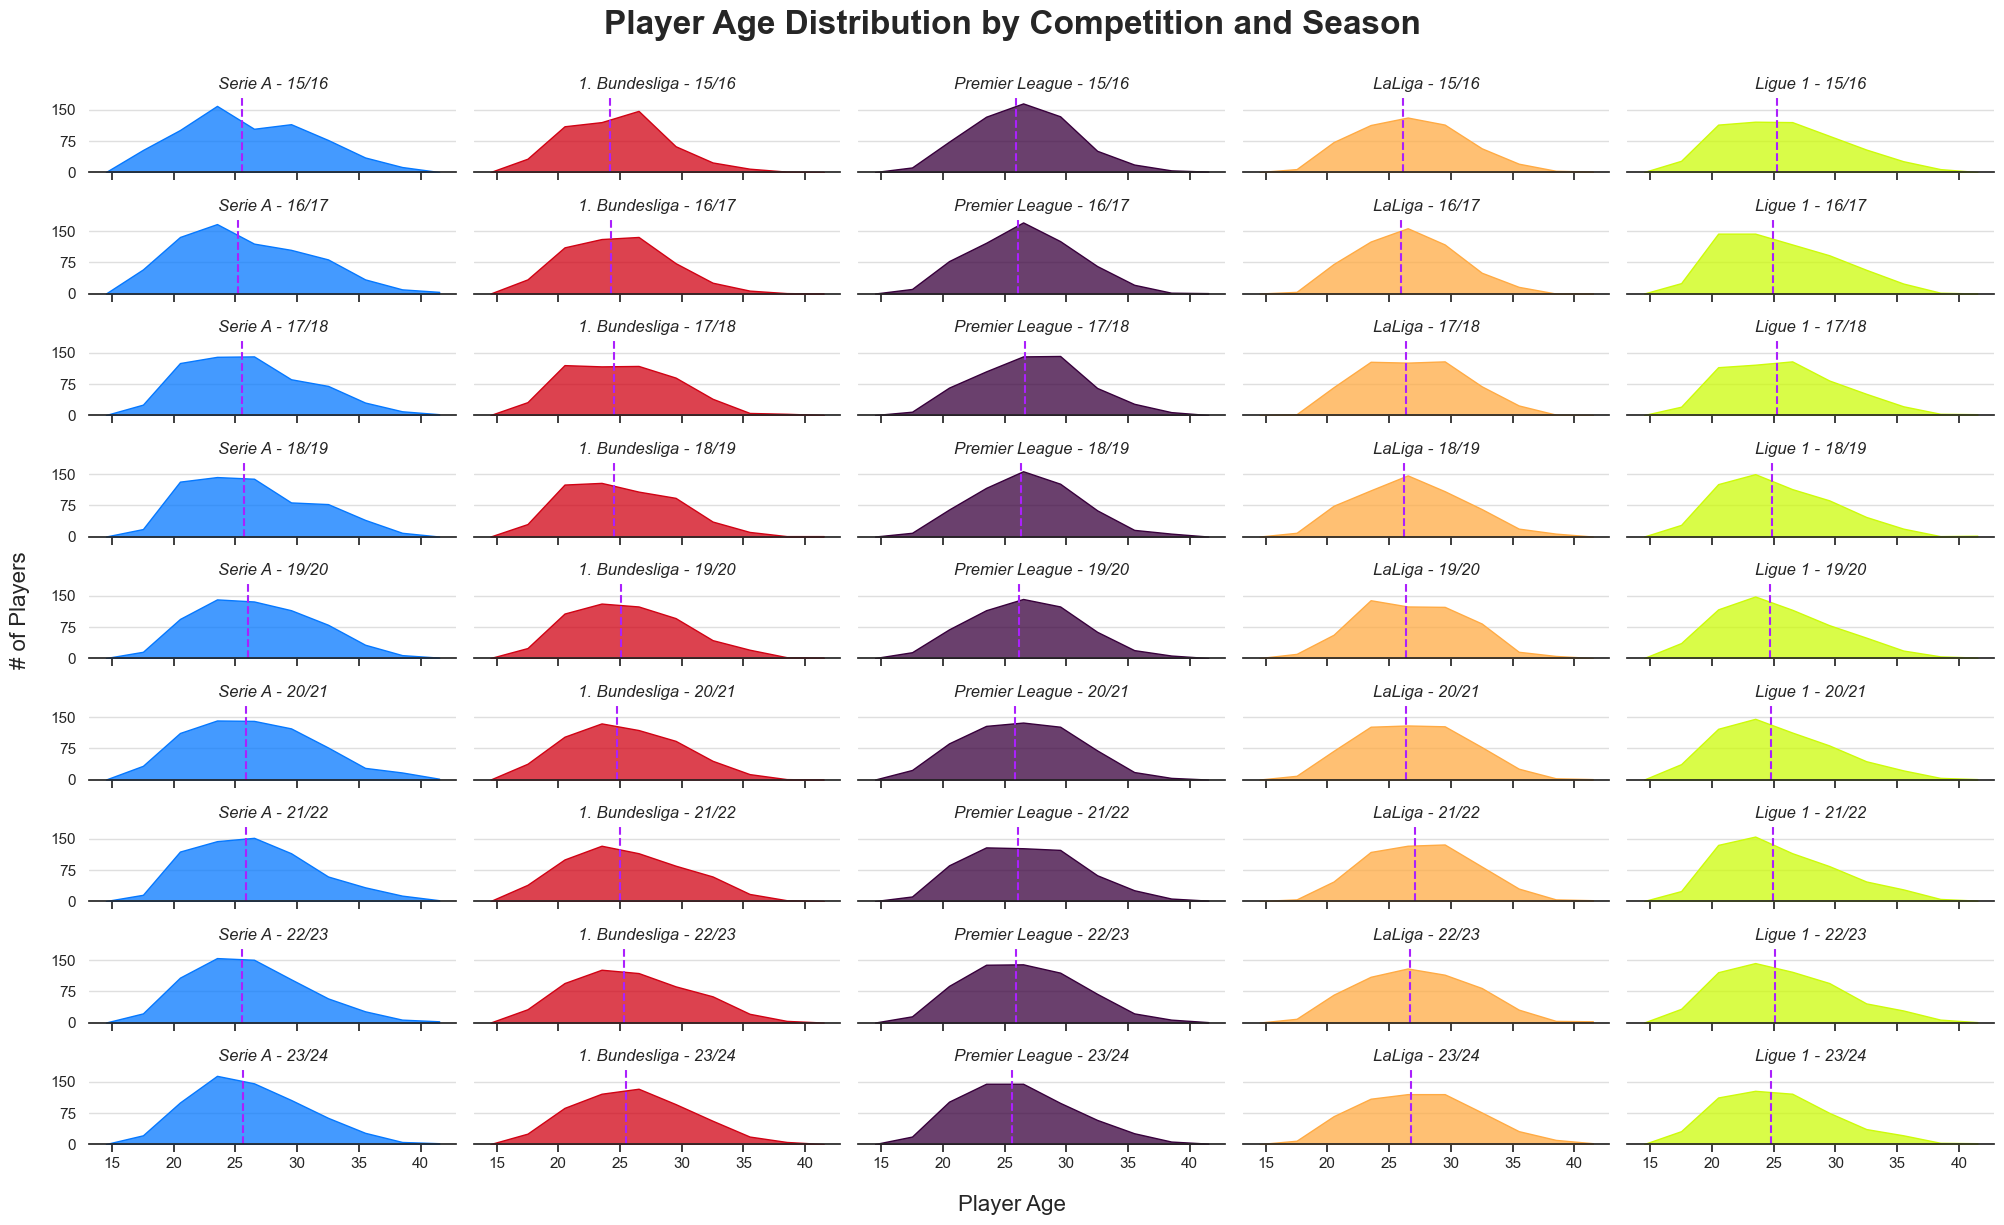

In [18]:
sns.set_theme(style="white", palette="muted", rc={'xtick.bottom': True})

# Filter out 'Out of Top 5' from the dataset
age_dist_viz_df = clean_eda_players_df.drop_duplicates(subset=['season', 'competition_id', 'club_id', 'player_id'],
                                keep='first') # measuring by how old the player was at the start of the season
age_dist_viz_df = age_dist_viz_df[age_dist_viz_df['competition_id'] != 'Out of Top 5']

# Create a list of unique seasons and competition names
seasons = age_dist_viz_df['season'].unique()
competitions = age_dist_viz_df['competition_id'].unique()
min_age = age_dist_viz_df['age_when_assessed'].min()
max_age = age_dist_viz_df['age_when_assessed'].max()

# Create subplots: Number of rows = number of seasons, number of columns = number of competitions
fig, axes = plt.subplots(len(seasons), len(competitions), figsize=(20, 12), sharex=True, sharey=True)

# Loop over seasons and competitions to plot histograms
for i, season in enumerate(seasons):
    for j, competition in enumerate(competitions):
        ax = axes[i, j]  # Get the subplot axis

        # Filter the data for the current season and competition
        season_competition_data = age_dist_viz_df[
            (age_dist_viz_df['season'] == season) & 
            (age_dist_viz_df['competition_id'] == competition)
        ]

        # Plot the histogram for 'age_when_assessed' with custom color and bin size of 3
        sns.histplot(season_competition_data['age_when_assessed'], ax=ax, kde=False,
                     bins=range(min_age - 3, max_age + 3, 3),
                     element="poly",
                     color=competition_colors.get(competition, '#000000'))

        mean_age = season_competition_data['age_when_assessed'].mean()
        ax.axvline(mean_age, color='#ab20fd', linestyle='--', label=f'Mean: {mean_age:.2f}')

        # Set the title and labels
        ax.set_yticks([0, 75, 150])
        ax.set_title(f"{competition} - {season}", fontstyle='italic')
        ax.set_xlabel(' ')
        ax.set_ylabel(' ')

        # Remove all spines except the bottom one (i.e., the left, right, and top spines)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        # Add horizontal gridlines for the y-ticks with low alpha for readability
        ax.grid(axis='y', linestyle='-', color='grey', alpha=0.25)

# Adjust layout for better readability
fig.suptitle('Player Age Distribution by Competition and Season', fontsize=24, y=1, weight='bold')
fig.text(0.5, -0.001, 'Player Age', ha='center', fontsize=16)
fig.text(-0.001, 0.5, '# of Players', va='center', rotation='vertical', fontsize=16)
plt.tight_layout()
plt.show()

**How to Interpret:** Showing the distribution of players' ages (at the start of the season) by competition & season. Purple dashed-line indicates mean age for that competition & season pair.

**Analysis:**
1. Ligue 1 & Serie A seem to have right skew distribution suggesting more younger players while Premier League & LaLiga seem to have a normal distribution (earlier seasons seem to have a slight left skew for Premier League however). Bundesliga seems have started with more older players but then distribution seems to have a slight right skew in more recent seasons.
2. LaLiga consistently has the higher average age among the other leagues while Ligue 1 consistently hovers around 25 or a little lower
   * Intereseting to note that in the Bundesliga, even though distribution changes suggest relatively more younger players, the mean age seems to have actually increased.

#### Height
1. What is the average height of players in general; How is it broken down by season, competition?
2. What clubs for which season have had the largest & smallest average height
3. What are the outliers in height? Are there players with unusually high or low heights? What impact do these outliers have on your analysis?
4. **How does height vary by position?** For example, goalkeepers might be taller than forwards.

#### Player’s Position
1. What is the distribution of main_position? Which positions are the most common? Are there fewer players in specific positions?
2. How does the distribution of main_position vary by season/competition? Has there been a shift in the types of positions over time?

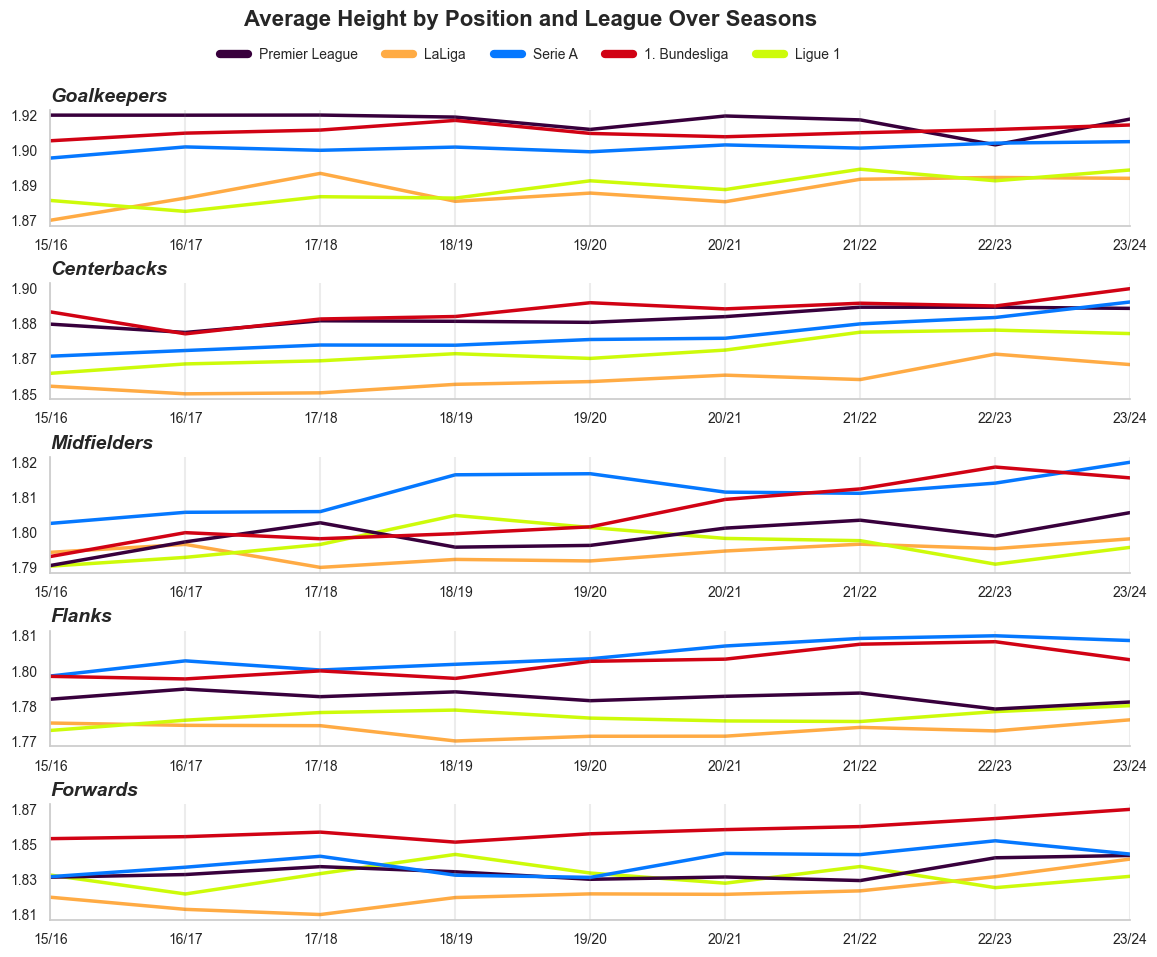

In [19]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams.update({
    'axes.titlesize': 16,     # Title size
    'axes.labelsize': 12,      # Axis label size
    'xtick.labelsize': 10,     # X tick label size
    'ytick.labelsize': 10,     # Y tick label size
    'legend.fontsize': 10,     # Legend font size
    'figure.titlesize': 18,    # Main figure title size
    'figure.figsize': (12, 10) # Overall figure size
})

# Map main positions to general positions
position_mapping = {
    'Goalkeeper': 'Goalkeepers',
    'Centre-Back': 'Centerbacks',
    'Right-Back': 'Flanks',
    'Left-Back': 'Flanks',
    'Central Midfield': 'Midfielders',
    'Defensive Midfield': 'Midfielders',
    'Attacking Midfield': 'Midfielders',
    'Left Midfield': 'Flanks',
    'Right Midfield': 'Flanks',
    'Centre-Forward': 'Forwards',
    'Right Winger': 'Flanks',
    'Left Winger': 'Flanks',
    'Second Striker': 'Forwards'
}

# Filter out 'Out of Top 5' from the dataset
height_dist_viz_df = (
    clean_eda_players_df
    .drop_duplicates(subset=['season', 'competition_id', 'club_id', 'player_id'], keep='last')
    .assign(general_position=lambda df: df['main_position'].map(position_mapping))
)
height_dist_viz_df = height_dist_viz_df[height_dist_viz_df['competition_id'] != 'Out of Top 5']
height_dist_viz_df['competition_id'] = height_dist_viz_df['competition_id'].cat.remove_unused_categories()

# Group data to calculate average height for each position, league, and season
time_series_data = (
    height_dist_viz_df
    .groupby(['season', 'competition_id', 'general_position'], observed=False)
    .agg(avg_height=('height_meters', 'mean'))
    .reset_index()
)

time_series_data['season'] = time_series_data['season'].cat.reorder_categories(
    new_categories=[
        '15/16', '16/17', '17/18', '18/19', '19/20',
        '20/21', '21/22', '22/23', '23/24'
    ],
    ordered=True
)

# Define the order of subplots and ensure vertical alignment
general_positions = ["Goalkeepers", "Centerbacks", "Midfielders", "Flanks", "Forwards"]

# Create the figure with vertical subplots
fig, axes = plt.subplots(len(general_positions), 1, figsize=(12, 10))  # Adjusted height for tight layout
axes = axes.flatten()  # Flatten for easier iteration

# Loop over each general position to create a subplot
for i, position in enumerate(general_positions):
    ax = axes[i]
    
    # Filter data for the current general position
    position_data = time_series_data[time_series_data['general_position'] == position]
    
    # Plot a line for each league
    for league, league_data in position_data.groupby('competition_id', observed=False):
        ax.plot(
            league_data['season'], league_data['avg_height'],
            label=league, color=competition_colors.get(league, 'grey'), linewidth=2.5
        )
    
    # Customize subplot appearance
    ax.set_title(f"{position}", fontsize=14, weight='bold', fontstyle='italic', loc='left')
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x')
    
    # Remove box around subplot and customize ticks
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.grid(False)
    for tick in ax.get_xticks():
        ax.axvline(x=tick, color='gray', linestyle='-', alpha=0.15)
    
    # Ensure only 4 consistent y-ticks, evenly spaced
    min_height = position_data['avg_height'].min()
    max_height = position_data['avg_height'].max()
    y_ticks = [min_height + i * (max_height - min_height) / 3 for i in range(4)]  # 4 consistent ticks
    ax.set_yticks(y_ticks)

    # Format y-tick labels to display only up to the hundredth decimal
    ax.set_yticklabels([f"{tick:.2f}" for tick in y_ticks])

    # Remove white space before first and after last season
    ax.set_xlim([position_data['season'].min(), position_data['season'].max()])

# Custom legend for leagues, placed below the main title in a horizontal row
custom_legend = [
    plt.Line2D([0], [0], color=competition_colors['Premier League'], lw=6, label='Premier League'),
    plt.Line2D([0], [0], color=competition_colors['LaLiga'], lw=6, label='LaLiga'),
    plt.Line2D([0], [0], color=competition_colors['Serie A'], lw=6, label='Serie A'),
    plt.Line2D([0], [0], color=competition_colors['1. Bundesliga'], lw=6, label='1. Bundesliga'),
    plt.Line2D([0], [0], color=competition_colors['Ligue 1'], lw=6, label='Ligue 1')
]
fig.legend(handles=custom_legend, loc="center", fontsize=10, bbox_to_anchor=(0.5, 0.975), ncol=5, frameon=False)

# Adjust spacing manually to avoid tight layout issue
plt.subplots_adjust(hspace=0.5, left=0.1, right=1, top=0.92)

# Set a title for the whole figure
fig.suptitle("Average Height by Position and League Over Seasons", fontsize=16, weight='bold', y=1.02)

# Show the plot
plt.show()

**Analysis:**
1. *Goalkeepers*: For Serie A, Bundesliga, and Premier League, average height seems to have remained around the same but have consistently been taller than LaLiga & Ligue 1. But seems like LaLiga & Ligue 1 goalkeeper average heights are increasing. Interesting to note there is a distinction in height for LaLiga & Ligue 1 where they never cross with the other leagues.
2. *Centerbacks*: In general there seems to be an increasing trend for height. Just last season, average height of Serie A centerbacks overtook average height of Premier League centerbacks.
3. *Midfielders*: Large-scale increases observed in Serie A and Bundesliga. Other leagues seem have fluctuated. Interesting to note that more recent seasons, there seems to be a increasing distinction between the average height of midfielders in Bundesliga & Serie A compared to the rest of the leagues.
4. *Flanks*: Again, key distinction noticed in Serie A & Bundesliga in terms of average height where it seems to have generally increased while the rest of the leagues seem to have remained constant.
5. *Forwards*: Ligue 1 & Premier League seemed to have remained constant while the rest of the leagues, the average height seems to be increasing, particularly in Bundesliga where last season the average height of forwards was amongst the highest.

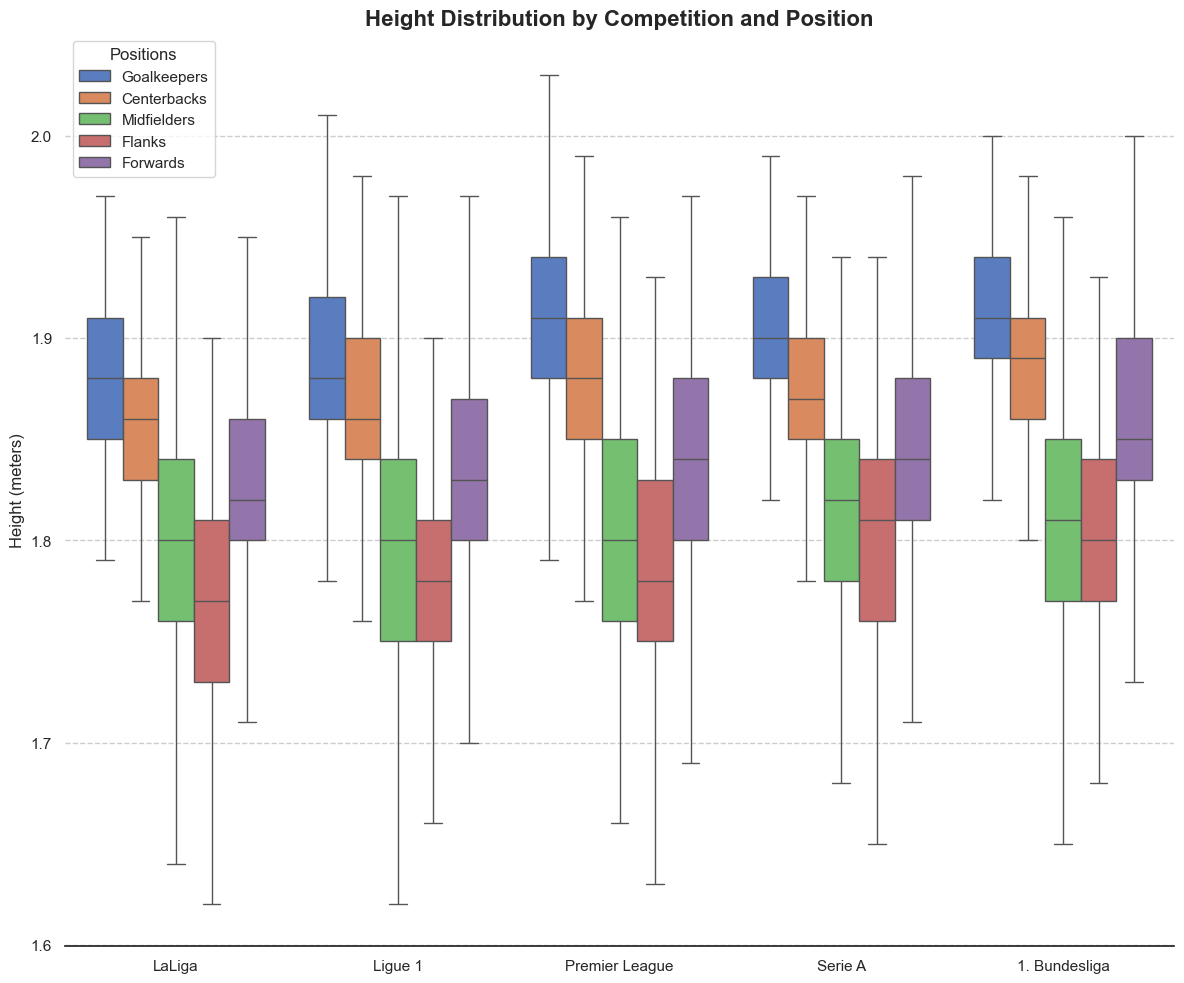

In [20]:
sns.set_theme(style="white", palette="muted")

ax = sns.boxplot(
    data=height_dist_viz_df,
    x='competition_id',
    y='height_meters',
    hue='general_position',
    showfliers=False,
    palette="muted",
    hue_order=["Goalkeepers", "Centerbacks", "Midfielders", "Flanks", "Forwards"]
)

# Set plot title and labels
ax.set_title('Height Distribution by Competition and Position', fontsize=16, weight='bold')
ax.set_xlabel('')
ax.set_ylabel('Height (meters)', fontsize=12)

# Adjust the legend title
legend = ax.get_legend()
legend.set_title('Positions')

# Remove the box around the plot, keeping only the bottom line
sns.despine(ax=ax, top=True, right=True, left=True)

# Add horizontal dashed grey lines for each y-tick
ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.4)

# Adjust spacing for the plot
plt.tight_layout()

# Show the plot
plt.show()

**Analysis:**
* In general, seems to be that Goalkeepers are the tallest, then Centerbacks, then Forwards, then Midfielders, and then flank roles.
1. *Goalkeepers*: Seem to consistently have higher IQRs and in Bundesliga, the IQR is distinct from other positions.
2. *Centerbacks*: LaLiga seems to generally have shorter defenders compared to rest of the league, even though it shares the same median height with Ligue 1 
3. *Midfielders*: Generally very similar all across
4. *Flanks*: Generally very similar all across but interesting to note that Ligue 1 seems to have the smallest IQR compared to other leagues
5. *Forwards*: Can see that generally LaLiga & Ligue 1 have smaller 75th percentiles than the rest of the leagues and Bundesliga seems to have in general the highest IQR.

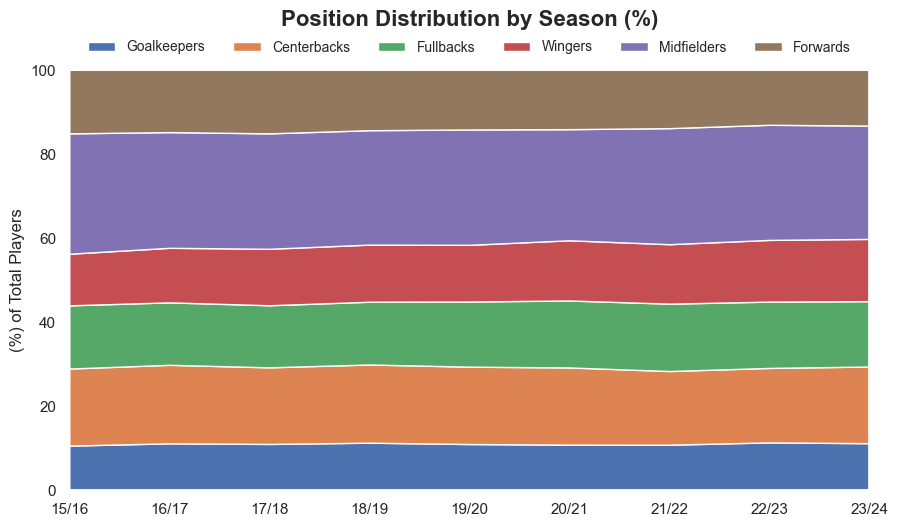

In [83]:
position_mapping_specific = {
    'Goalkeeper': 'Goalkeepers',
    'Centre-Back': 'Centerbacks',
    'Right-Back': 'Fullbacks',
    'Left-Back': 'Fullbacks',
    'Central Midfield': 'Midfielders',
    'Defensive Midfield': 'Midfielders',
    'Attacking Midfield': 'Midfielders',
    'Left Midfield': 'Wingers',
    'Right Midfield': 'Wingers',
    'Centre-Forward': 'Forwards',
    'Right Winger': 'Wingers',
    'Left Winger': 'Wingers',
    'Second Striker': 'Forwards'
}

# Setting up data
position_dist_viz_df = (
    clean_eda_players_df
    .drop_duplicates(subset=['season', 'competition_id', 'club_id', 'player_id'], keep='last')
    .assign(general_position=lambda df: df['main_position'].map(position_mapping_specific))
)
position_dist_viz_df = position_dist_viz_df[position_dist_viz_df['competition_id'] != 'Out of Top 5']
position_dist_viz_df['competition_id'] = position_dist_viz_df['competition_id'].cat.remove_unused_categories()
position_dist_viz_df['season'] = position_dist_viz_df['season'].cat.reorder_categories(
    new_categories=[
        '15/16', '16/17', '17/18', '18/19', '19/20',
        '20/21', '21/22', '22/23', '23/24'
    ],
    ordered=True
)
position_dist_viz_df['general_position'] = position_dist_viz_df['general_position'].astype('category')
position_dist_viz_df['general_position'] = position_dist_viz_df['general_position'].cat.reorder_categories(
    new_categories=[
        'Goalkeepers', 'Centerbacks', 'Fullbacks', 'Wingers', 'Midfielders', 'Forwards'
    ],
    ordered=True
)

position_counts = position_dist_viz_df.groupby(['season', 'general_position'], observed=True).size()
total_counts = position_dist_viz_df.groupby('season', observed=True).size()
area_chart_data = round((position_counts / total_counts) * 100, 2).reset_index(name='percentage')
pivoted_data = area_chart_data.pivot(index='season', columns='general_position', values='percentage')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(False)

ax.stackplot(pivoted_data.index, pivoted_data.T, labels=pivoted_data.columns, alpha=1)


fig.suptitle('Position Distribution by Season (%)', weight='bold', fontsize=16, y=0.95)
fig.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.15)

ax.set_xlim([pivoted_data.index.min(), pivoted_data.index.max()])
ax.set_ylim([0, 100])

ax.set_ylabel('(%) of Total Players')
ax.legend(
    labels=pivoted_data.columns,
    loc='upper center', bbox_to_anchor=(0.5, 1.1),
    ncol=len(pivoted_data.columns),
    frameon=False,
    fontsize=10
)

plt.show()

**Analysis:** Seems like position distribution by season has remained relatively the same when comparing using proportions.

In [84]:
position_counts_competition = position_dist_viz_df.groupby(['general_position', 'competition_id', 'season'], observed=True).size()
display(position_counts_competition)
# total_counts_competition = position_dist_viz_df.groupby('general_position', observed=True).size()
# area_chart_data = round((position_counts / total_counts) * 100, 2).reset_index(name='percentage')

# # Prepare data for heatmaps
# heatmap_data = height_dist_viz_df.groupby(['general_position', 'competition_id', 'season']) \
#     .size() \
#     .groupby(level=[1, 2])  # Normalize within competition and season
#     .apply(lambda x: 100 * x / x.sum()) \
#     .reset_index(name='percentage')

# # Create the 3x2 grid
# fig, axes = plt.subplots(3, 2, figsize=(16, 12), sharex=True, sharey=True)

# # List of positions and their subplot locations
# positions = [
#     "Goalkeepers", "Centerbacks", "Fullbacks",
#     "Wingers", "Midfielders", "Forwards"
# ]

# for pos, ax in zip(positions, axes.flatten()):
#     pos_data = heatmap_data[heatmap_data['general_position'] == pos]
#     pivot_data = pos_data.pivot(
#         index='competition_id', columns='season', values='percentage'
#     )
#     sns.heatmap(
#         pivot_data, 
#         ax=ax,
#         cmap="YlGnBu",
#         cbar=True,  # Remove if you want individual color bars
#         annot=True, fmt=".1f", linewidths=.5
#     )
#     ax.set_title(f'{pos}')
#     ax.set_xlabel('Season')
#     ax.set_ylabel('Competition')

# plt.tight_layout()
# plt.show()

general_position  competition_id  season
Goalkeepers       LaLiga          15/16     49
                                  16/17     58
                                  17/18     55
                                  18/19     53
                                  19/20     52
                                            ..
Forwards          1. Bundesliga   19/20     85
                                  20/21     93
                                  21/22     86
                                  22/23     78
                                  23/24     87
Length: 270, dtype: int64